In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data\Data Sets\milk.csv', index_col=0)
df.head()

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


<Figure size 400x400 with 0 Axes>

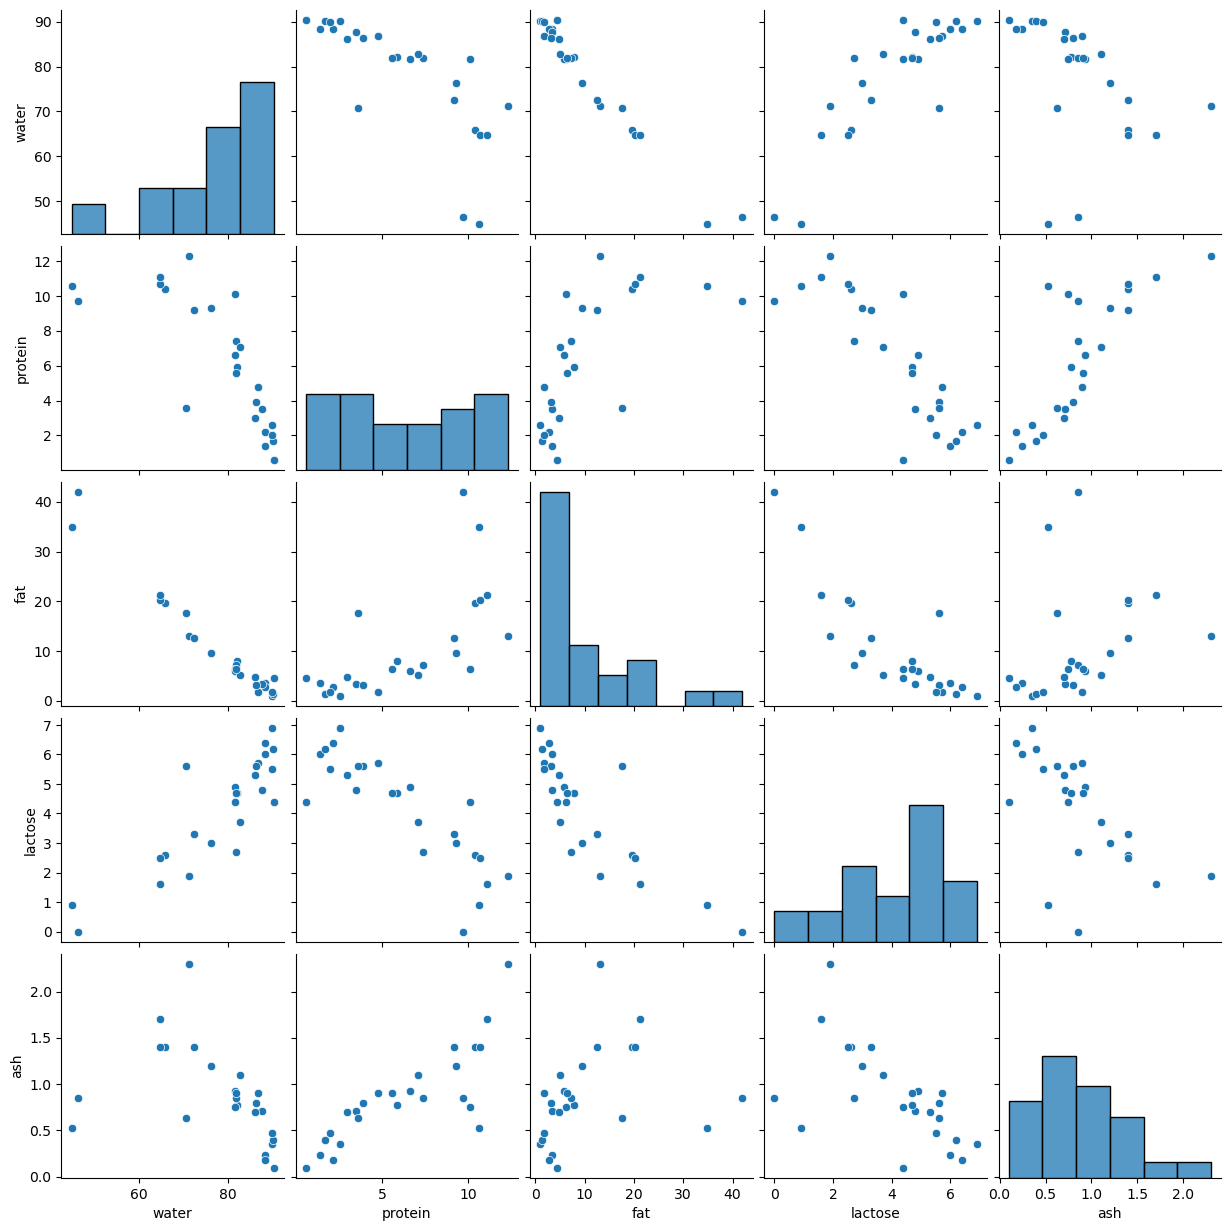

In [4]:
plt.figure(figsize=(4,4))
sns.pairplot(data=df, palette="Set2")
plt.show()

In [5]:
scalar = StandardScaler().set_output(transform='pandas')
df_scaled = scalar.fit_transform(df)

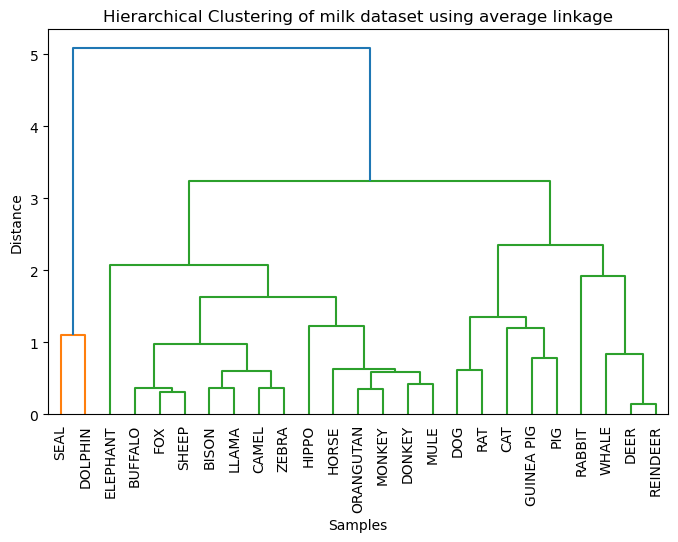

In [6]:
link = "average"
mergings = linkage(df_scaled, method=link)

plt.figure(figsize=(8,5))
dendrogram(mergings, labels=df_scaled.index)
plt.title(f"Hierarchical Clustering of milk dataset using {link} linkage")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.xticks(rotation=90)    
plt.show()

To make cluseters algorithms drow horizontal lines, we need to plot the dendrogram. We can use the `dendrogram` function from the `scipy.cluster.hierarchy` module.


`silhouette score` help us to understand the quality of the clustering. 

The silhouette score is the average of the distances of each point to its nearest neighbor. 

The closer the silhouette score is to 1, the better the clustering is.


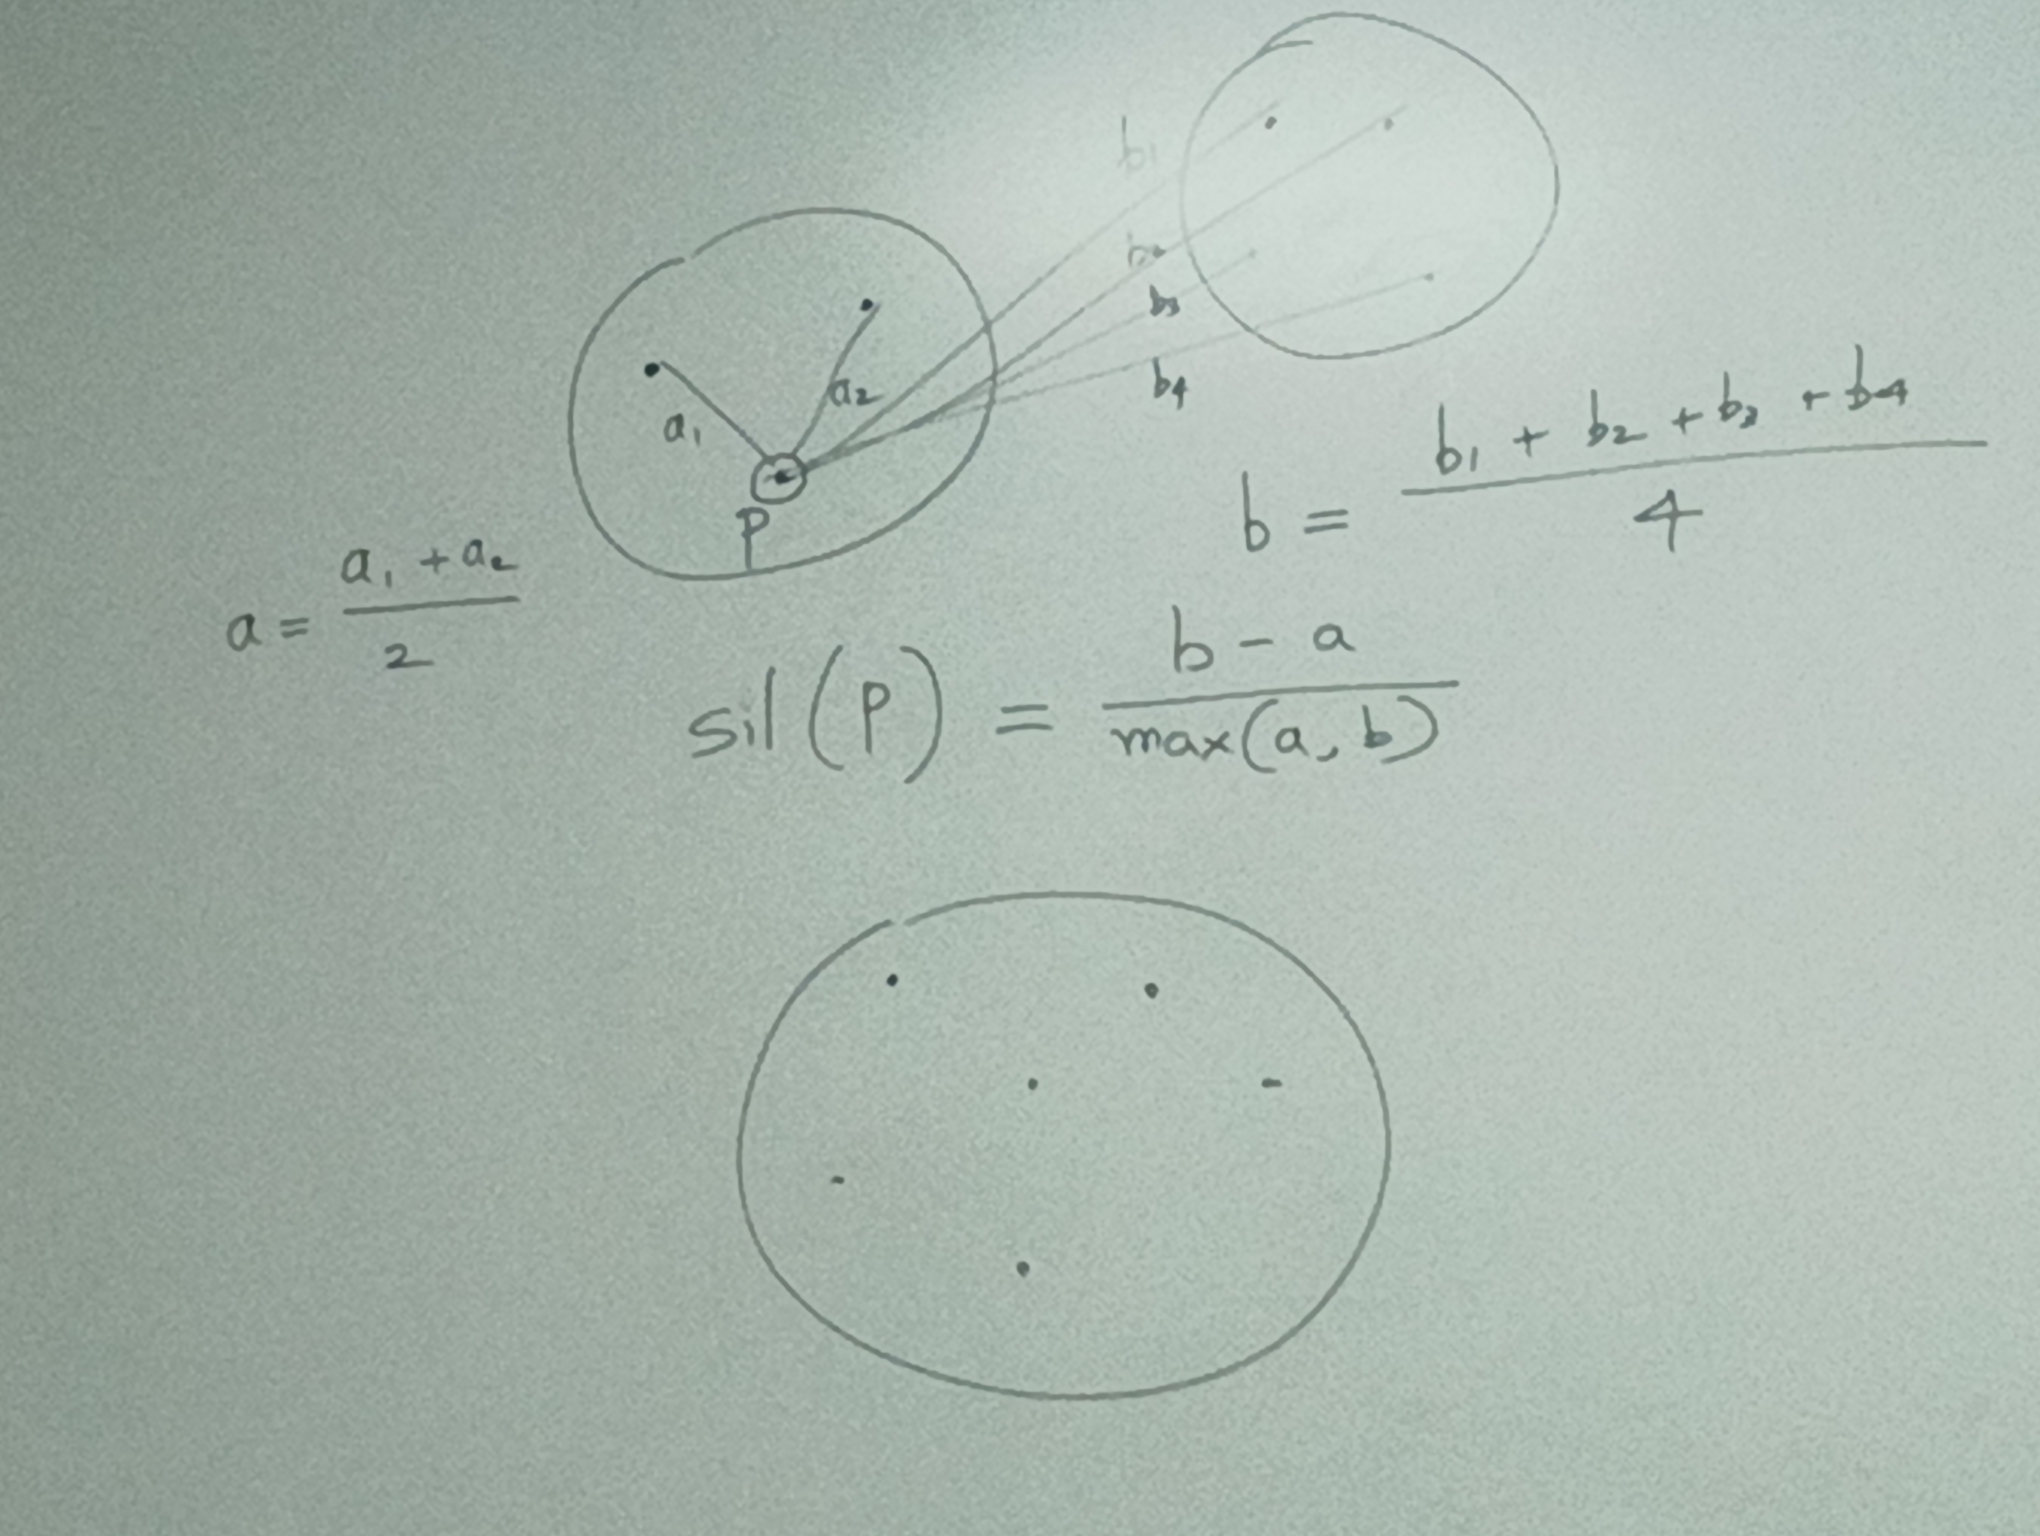

#### Using  AgglomerativeClustering

In [ ]:
ag_clust = AgglomerativeClustering(
    n_clusters=3, 
    linkage='average'
)

ag_clust.fit(df_scaled)

print(
    'Silhouette Score:', 
    silhouette_score(df_scaled, ag_clust.labels_)
)

Silhouette Coefficient: 0.48757649189546187


In [ ]:
df_clusters = pd.DataFrame({
    'Cluster': ag_clust.labels_,
    }, index=df_scaled.index
).sort_values('Cluster')

Evaluate Silhouette score for different nmbers of cluster 

In [ ]:
scores = []
no_clusters = [2,3,4,5,6]
for i in no_clusters:
    clust = ag_clust = AgglomerativeClustering(
        n_clusters=i, 
        linkage='average'
    )

    clust.fit(df_scaled)

    scores.append(
        silhouette_score(df_scaled, clust.labels_)
    )

print(scores)

index_max = np.argmax(scores)
print('Best number of clusters', no_clusters[index_max])

[0.5186847578981009, 0.48757649189546187, 0.41601538367376095, 0.3830100222472541, 0.37428423003570394]
Best number of clusters 2


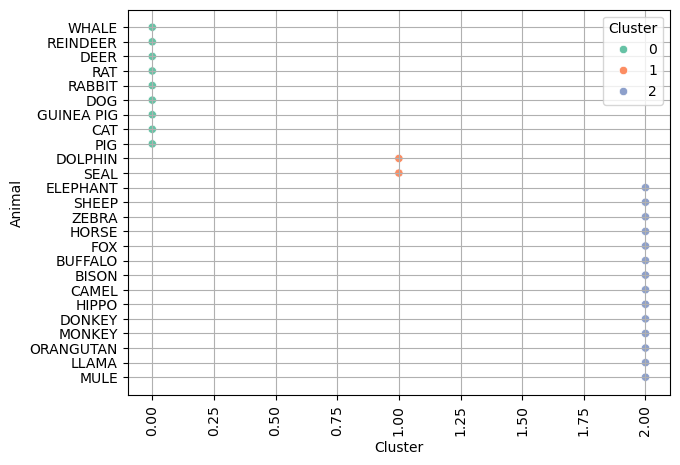

In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x='Cluster', 
    y=df_clusters.index,
    hue='Cluster', 
    data=df_clusters, 
    palette='Set2'
)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

